# Adjunct to Course04 Week04

## Additional K-Means Clustering details

The analysis of the clusters obtained in Week04 Course 04 was interesting but would have been moe tanglible if names of the local authorities in each cluster were known.  However, the dataframe I used no longer had names of the local authorities.

The aim of this exercise is to go bak a few stages and create an optimised data frame that has the desired fields, including local autority name and region, and then repeat the K-MC exercise. The output shluld be similar, but with names against clusters. Also, I woul like to know the name of the local authority which is closest to each cluster's centroid.

## Importing the data set

In [447]:
# import libraries
import numpy as np
import pandas as pd

# read-in file and check what is there
df1011 = pd.read_csv('/Users/RAhmed/WesleyanMOOC/W_data_store/csv_files/study_data1011.csv')
df1011.head()

,Area Code,Region,Area Name,Obesity proportion,IMD - Average score,IMD - Proportion of LSOAs in most deprived 10% nationally,GDHI,Income - Average score,Income - Proportion of LSOAs in most deprived 10% nationally,Income Deprivation Affecting Children Index (IDACI) - Average score,...,"Education, Skills and Training - Average score","Education, Skills and Training - Proportion of LSOAs in most deprived 10% nationally",Health Deprivation and Disability - Average score,Health Deprivation and Disability - Proportion of LSOAs in most deprived 10% nationally,Crime - Average score,Crime - Proportion of LSOAs in most deprived 10% nationally,Barriers to Housing and Services - Average score,Barriers to Housing and Services - Proportion of LSOAs in most deprived 10% nationally,Living Environment - Average score,Living Environment - Proportion of LSOAs in most deprived 10% nationally
0,E06000001,North East,Hartlepool,24.170616,33.178,0.3276,15410,0.239,0.3621,0.307,...,30.510,0.2069,0.929,0.4138,0.078,0.1207,13.128,0.0172,8.260,0.0000
1,E06000002,North East,Middlesbrough,23.953488,40.216,0.4884,15166,0.268,0.4884,0.357,...,40.640,0.4419,1.195,0.5581,0.633,0.3837,18.316,0.0000,12.907,0.0116
2,E06000003,North East,Redcar and Cleveland,22.464789,28.567,0.2159,14773,0.204,0.2386,0.273,...,27.875,0.1818,0.752,0.3068,-0.013,0.1023,12.863,0.0000,7.923,0.0114
3,E06000004,North East,Stockton-on-Tees,21.218962,24.625,0.1833,15722,0.177,0.2167,0.226,...,24.637,0.1750,0.548,0.2083,-0.263,0.0250,17.844,0.0250,7.068,0.0083
4,E06000005,North East,Darlington,21.035058,23.639,0.1538,15537,0.168,0.1692,0.215,...,22.569,0.1385,0.502,0.2000,0.224,0.0923,12.346,0.0154,10.710,0.0000


In [448]:
# slim down dataframe
drop_list = []
for item in df1011.head(0):
    if 'LSOAs' in item:
        drop_list.append(item)
df1011 = df1011.drop(drop_list, axis=1)
df1011.head()

,Area Code,Region,Area Name,Obesity proportion,IMD - Average score,GDHI,Income - Average score,Income Deprivation Affecting Children Index (IDACI) - Average score,Employment - Average score,"Education, Skills and Training - Average score",Health Deprivation and Disability - Average score,Crime - Average score,Barriers to Housing and Services - Average score,Living Environment - Average score
0,E06000001,North East,Hartlepool,24.170616,33.178,15410,0.239,0.307,0.211,30.510,0.929,0.078,13.128,8.260
1,E06000002,North East,Middlesbrough,23.953488,40.216,15166,0.268,0.357,0.216,40.640,1.195,0.633,18.316,12.907
2,E06000003,North East,Redcar and Cleveland,22.464789,28.567,14773,0.204,0.273,0.186,27.875,0.752,-0.013,12.863,7.923
3,E06000004,North East,Stockton-on-Tees,21.218962,24.625,15722,0.177,0.226,0.156,24.637,0.548,-0.263,17.844,7.068
4,E06000005,North East,Darlington,21.035058,23.639,15537,0.168,0.215,0.150,22.569,0.502,0.224,12.346,10.710


In [449]:
# shorten names of variables
new_names = ['AreaCode', 'Region', 'AreaName', 'Obesity','IMD', 'GDHI', 'Income', 'IDACI', 'Employment',
             'Education', 'Health', 'Crime', 'Barriers', 'Environment']
df1011.columns = new_names
df1011.head()

,AreaCode,Region,AreaName,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment
0,E06000001,North East,Hartlepool,24.170616,33.178,15410,0.239,0.307,0.211,30.510,0.929,0.078,13.128,8.260
1,E06000002,North East,Middlesbrough,23.953488,40.216,15166,0.268,0.357,0.216,40.640,1.195,0.633,18.316,12.907
2,E06000003,North East,Redcar and Cleveland,22.464789,28.567,14773,0.204,0.273,0.186,27.875,0.752,-0.013,12.863,7.923
3,E06000004,North East,Stockton-on-Tees,21.218962,24.625,15722,0.177,0.226,0.156,24.637,0.548,-0.263,17.844,7.068
4,E06000005,North East,Darlington,21.035058,23.639,15537,0.168,0.215,0.150,22.569,0.502,0.224,12.346,10.710


## Manipulate data and run K-Means Clustering

sklearn only takes quantitative data, so all labels, etc, are lost. Basically we are not able to use pandas' metadata.  There is a specific sklearn-pandas library, detailed in this article:<br>
https://stxnext.com/blog/2017/12/12/getting-started-machine-learning-python/<br><br>
However this doesn't seem much used and I couldn't get to install.

I want to standardise predictors for the k-means clustering, this could be done in pandas, but I will do in sklearn, realising all column labels, etc., are lost. However, putting back into dataframes and merging with pandas worked out to be straightforward. (Done further down.)

Text(0.5,1,'Selecting k with the Elbow Method')

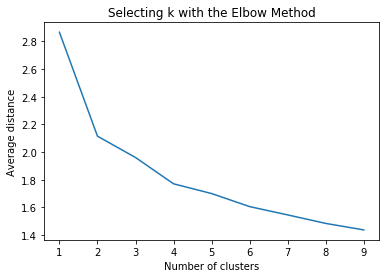

In [450]:
# create subdataframe for sklearn
predictors = df1011[['IMD', 'GDHI', 'Income', 'IDACI', 'Employment',
             'Education', 'Health', 'Crime', 'Barriers', 'Environment']]

# import matplotlib and make inline plots
import matplotlib.pylab as plt
%matplotlib inline

# import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

standardizer = StandardScaler() 
predictors_standardized = standardizer.fit_transform(predictors)

# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state=100)
    model.fit(predictors_standardized)
    clusassign=model.predict(predictors_standardized)
    meandist.append(sum(np.min(cdist(predictors_standardized, model.cluster_centers_, 'euclidean'), axis=1)) 
    / predictors_standardized.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

As before, the elbow method looks as though 4 is a good number of clusters. PCA is used to create two 'canonical' variables (linear combinations of explanatory variables) that best describes the data, so we can visualise in 2D.

In [451]:
# Interpret 4 cluster solution
model4=KMeans(n_clusters=4, random_state=100)
model4.fit(predictors_standardized)
clusassign=model4.predict(predictors_standardized)

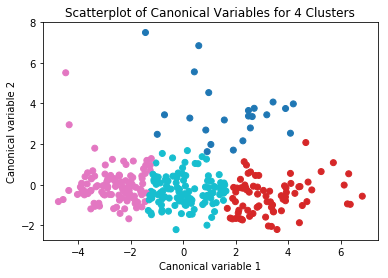

In [452]:
# plot clusters
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(predictors_standardized)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model4.labels_, cmap="tab10")
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

Colours vary by run. cluster 0 is bottom left, cluster 1 in lower middle, cluster two on right, and cluster 3 is the more spread out cluster at the top. (Colours from 'tab10' colour map I used. https://matplotlib.org/users/colormaps.html)

## Key info for later

We want to add back the cluster assignments to the main dataframe. Currently the cluster assignments are given in clusassign, which is an np array. 

In [453]:
print(clusassign[:15], type(clusassign))

[1 1 1 1 1 1 3 1 1 1 3 1 3 2 1] <class 'numpy.ndarray'>


In [454]:
# need to turn np array into pandas dataframe
df_clusassign = pd.DataFrame(clusassign)
df_clusassign.head(15)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,3
7,1
8,1
9,1


Find cluster centres.

In [455]:
model4.cluster_centers_

array([[ 0.97846708,  1.55016206,  1.11453617,  1.36869588,  0.27674536,
        -0.66154565,  0.24908421,  1.75535908,  1.87977884,  1.56248439],
       [ 1.30478448, -0.77232928,  1.27395281,  1.17112428,  1.395329  ,
         1.22902364,  1.27547881,  0.78289464, -0.62789716,  0.2860306 ],
       [-1.00303843,  0.39216997, -0.99673918, -0.99495728, -0.98918022,
        -0.86572906, -1.02291711, -0.82355568,  0.14987189, -0.41029152],
       [-0.04437309, -0.20202281, -0.05801581, -0.04331185,  0.02425581,
         0.19997893,  0.14376655, -0.03877393, -0.11838844, -0.0903178 ]])

This is interesting as it gives the cluster centre value for each predictor variable!<br>

Note that clustering is same as Course04 Week04 (same random seed), but labels are different.

# Create new pandas dataframe

Ultimately we want to merge the first four columns of the original df1011 dataframe with the model4 info (as a dataframe) and the cluster assignments (that are now a dataframe in df_clusassign).<br>

We'll do this step by step.

In [456]:
# make standaridised predictors np array into dataframe
df_predictors_standardized = pd.DataFrame(predictors_standardized)
df_predictors_standardized
# merge standaridised predictors with cluster assignments
df_combined = pd.merge(df_predictors_standardized, df_clusassign, right_index = True, left_index = True)
df_combined.head(15)

,0_x,1,2,3,4,5,6,7,8,9,0_y
0,1.715977,-0.831153,2.184356,1.883591,2.590364,1.161293,1.653759,0.440429,-1.477568,-1.233915,1
1,2.596589,-0.873244,2.768293,2.600454,2.717243,2.352492,2.059931,1.641165,-0.574907,-0.766114,1
2,1.139037,-0.941038,1.479606,1.396124,1.955967,0.851440,1.383486,0.243552,-1.523676,-1.267840,1
3,0.645805,-0.777332,0.935941,0.722272,1.194690,0.470679,1.071985,-0.297320,-0.657030,-1.353911,1
4,0.522434,-0.809245,0.754719,0.564563,1.042435,0.227500,1.001745,0.756298,-1.613629,-0.987280,1
5,1.561451,-0.847886,1.419199,1.324437,1.778336,0.781003,1.707203,0.987791,-0.501657,0.029964,1
6,-0.018971,-0.199615,-0.171524,-0.324348,0.154279,-0.234163,0.772700,0.003405,-0.943766,-0.081576,3
7,1.842476,-1.333658,1.701099,0.922994,1.803712,1.677871,1.795767,1.318805,-1.590662,1.018719,1
8,2.819432,-1.004692,2.546800,2.199010,3.021754,1.757363,2.508859,2.069535,-2.310112,1.751678,1
9,2.724088,-1.229120,2.546800,2.356720,2.361981,2.763356,1.304084,2.019775,0.268772,1.428636,1


In [457]:
# relabel columns
newlabels = ['IMD', 'GDHI', 'Income', 'IDACI', 'Employment',
             'Education', 'Health', 'Crime', 'Barriers', 'Environment', 'Cluster']
df_combined.columns = newlabels
df_combined.head(1)

,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment,Cluster
0,1.715977,-0.831153,2.184356,1.883591,2.590364,1.161293,1.653759,0.440429,-1.477568,-1.233915,1


In [458]:
# merge the combined dataframe with first four columns of df1011 
# for speed will first shorten df1011 
df_mini = df1011.drop(predictors, axis=1)
df_master = pd.merge(df_mini, df_combined, right_index = True, left_index = True)
df_master.head(1)

,AreaCode,Region,AreaName,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment,Cluster
0,E06000001,North East,Hartlepool,24.170616,1.715977,-0.831153,2.184356,1.883591,2.590364,1.161293,1.653759,0.440429,-1.477568,-1.233915,1


In [459]:
# sort by cluster, easier to do to have individual datframes
df_clus0 = df_master[df_master['Cluster']==0]
df_clus1 = df_master[df_master['Cluster']==1]
df_clus2 = df_master[df_master['Cluster']==2]
df_clus3 = df_master[df_master['Cluster']==3]
# example of cluster 3
df_clus3.head()

,AreaCode,Region,AreaName,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment,Cluster
6,E06000007,North West,Warrington,18.686646,-0.018971,-0.199615,-0.171524,-0.324348,0.154279,-0.234163,0.772700,0.003405,-0.943766,-0.081576,3
10,E06000011,Yorks and Humber,East Riding of Yorkshire,17.523220,-0.459402,-0.347279,-0.433289,-0.639767,-0.150231,-0.285315,-0.468722,-0.939876,-0.027011,-0.361129,3
12,E06000013,Yorks and Humber,North Lincolnshire,22.617033,0.237655,-0.916715,0.392276,0.421190,0.509542,0.625429,0.453565,0.269513,-0.960469,-0.520184,3
18,E06000019,West Midlands,Herefordshire,19.777503,0.034206,-0.209103,-0.393017,-0.539406,-0.378614,-0.153966,-0.265636,-0.883625,2.215028,1.310251,3
23,E06000024,South West,North Somerset,14.636696,-0.460528,-0.050572,-0.292339,-0.396034,-0.048728,-0.542840,-0.105304,-0.511506,-0.495741,-0.860943,3


# Detailed Cluster Analysis

In [460]:
# size of each cluster
clus_list = [df_clus0, df_clus1, df_clus2, df_clus3]
for index, cluster in enumerate(clus_list):
    print(index, len(cluster))

0 23
1 75
2 115
3 113


In [461]:
# means for each cluster
df_means = df_master.groupby('Cluster').mean()
df_means

,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment
Cluster,,,,,,,,,,,
0,24.138337,0.978467,1.550162,1.114536,1.368696,0.276745,-0.661546,0.249084,1.755359,1.879779,1.562484
1,21.727878,1.304784,-0.772329,1.273953,1.171124,1.395329,1.229024,1.275479,0.782895,-0.627897,0.286031
2,15.180144,-1.003038,0.392170,-0.996739,-0.994957,-0.989180,-0.865729,-1.022917,-0.823556,0.149872,-0.410292
3,18.749649,-0.044373,-0.202023,-0.058016,-0.043312,0.024256,0.199979,0.143767,-0.038774,-0.118388,-0.090318


Re-print the 'pen-picture' cluster analysis of the blog to the course. (Had to change names as labels are different to yesterday's work.)

**Cluster 0:** Size = 22. Cluster 0 is consistent with cities with very high income (GDHI) a well educated workforce, simultaneous with high Income and Employment deprivation. Crime, Barriers to Housing and Services and Living Environment are the highest.<br>

This cluster has the highest obesity.  It is exclusively composed of London inner-city boroughs!

**Cluster name Slough** (from section below).

**Cluster 1:** Size = 75. Cluster 1 has lowest GDHI, the highest Income and Employment deprivation and the worst Education and Health deprivation. Yet it it has the least Crime and best Living Environment and least Barriers to Housing and Services.<br>

On checking (df_clus1) local authorities includes cities and large towns  such as Manchester, Bristol, Portsmouth, Stoke sand Doncaster, as well as a small number of deprived rural areas such as Fenland and North-East Lincolnshire.  This cluster has the second highest obesity level.

**Cluster name Dudley** (from section below).

**Cluster 2** Size = 115.  Cluster 2 has high income (GDHI) but far below cluster 3. It has the lowest levels of deprivation, except for having high Barriers to Housing and Services. Low Education deprivation. <br>

On checking (df_clus2) local authorities includes well-off market towns/cities (Horsham, York) and well-off suburban areas (Richmond, Kingson, Epsom).  This cluster has the lowest obesity level.

**Cluster name Watford** (from section below).

**Cluster 3:** Size = 114. Cluster 3 is the least interesting, as all deprivation levels were close to the mean.<br>

On checking (df_clus3) local authorities includes large towns such as Reading, Brighton, Crawley, Bournemouth, Worcester and Exeter. This cluster has the second lowest obesity level.

**Cluster name Watford** (from section below).

# Cluster Naming

It would be very neat to name each cluster with the name of the local authority that is closest to the cluster centre. <br>

Easiest is to take each cluster's datframe, split the quantitative data into an np array, perform calculations, then manipulate and turn back into a dataframe.  We'll do this step by step.

In [462]:
# reminder of df_means
df_means

,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment
Cluster,,,,,,,,,,,
0,24.138337,0.978467,1.550162,1.114536,1.368696,0.276745,-0.661546,0.249084,1.755359,1.879779,1.562484
1,21.727878,1.304784,-0.772329,1.273953,1.171124,1.395329,1.229024,1.275479,0.782895,-0.627897,0.286031
2,15.180144,-1.003038,0.392170,-0.996739,-0.994957,-0.989180,-0.865729,-1.022917,-0.823556,0.149872,-0.410292
3,18.749649,-0.044373,-0.202023,-0.058016,-0.043312,0.024256,0.199979,0.143767,-0.038774,-0.118388,-0.090318


In [463]:
# create np array of each cluster's means for the predictor variables
clus0_means = np.asarray(df_means.iloc[0][1:])
clus1_means = np.asarray(df_means.iloc[1][1:])
clus2_means = np.asarray(df_means.iloc[2][1:])
clus3_means = np.asarray(df_means.iloc[3][1:])

In [464]:
# check this does what we want
clus3_means

array([-0.04437309, -0.20202281, -0.05801581, -0.04331185,  0.02425581,
        0.19997893,  0.14376655, -0.03877393, -0.11838844, -0.0903178 ])

Make each necessary array for each cluster's data

In [465]:
# drop non-predictor variables from cluster dataframes
temp0 =  df_clus0.drop(['AreaCode', 'Region', 'AreaName', 'Obesity', 'Cluster'], axis=1)
temp1 =  df_clus1.drop(['AreaCode', 'Region', 'AreaName', 'Obesity', 'Cluster'], axis=1)
temp2 =  df_clus2.drop(['AreaCode', 'Region', 'AreaName', 'Obesity', 'Cluster'], axis=1)
temp3 =  df_clus3.drop(['AreaCode', 'Region', 'AreaName', 'Obesity', 'Cluster'], axis=1)

Make temp dataframes into np arrays

In [466]:
clus0_array = np.asarray(temp0)
clus1_array = np.asarray(temp1)
clus2_array = np.asarray(temp2)
clus3_array = np.asarray(temp3)

In [467]:
# add relevant means vector to each cluster's np array
for row in clus0_array:
    row += clus0_means
for row in clus1_array:
    row += clus1_means
for row in clus2_array:
    row += clus2_means    
for row in clus3_array:
    row += clus3_means

In [468]:
# need to square each element in arrays
sq_errors0 = clus0_array**2
sq_errors1 = clus1_array**2
sq_errors2 = clus2_array**2
sq_errors3 = clus3_array**2

In [469]:
# need to create a dataframe that has sum of square errors from each row, name column
sum_errors0 = sq_errors0.sum(axis=1)
df_sum_errors0 = pd.DataFrame(sum_errors0)
df_sum_errors0.columns = ['SumErrors']

sum_errors1 = sq_errors1.sum(axis=1)
df_sum_errors1 = pd.DataFrame(sum_errors1)
df_sum_errors1.columns = ['SumErrors']

sum_errors2 = sq_errors2.sum(axis=1)
df_sum_errors2 = pd.DataFrame(sum_errors2)
df_sum_errors2.columns = ['SumErrors']

sum_errors3 = sq_errors3.sum(axis=1)
df_sum_errors3 = pd.DataFrame(sum_errors3)
df_sum_errors3.columns = ['SumErrors']

### Further steps for cluster 3, to see how this works

In [470]:
df_sum_errors3.head()

,SumErrors
0,2.385113
1,2.574948
2,4.456384
3,7.589614
4,2.338993


In [471]:
df_clus3.head()

,AreaCode,Region,AreaName,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment,Cluster
6,E06000007,North West,Warrington,18.686646,-0.018971,-0.199615,-0.171524,-0.324348,0.154279,-0.234163,0.772700,0.003405,-0.943766,-0.081576,3
10,E06000011,Yorks and Humber,East Riding of Yorkshire,17.523220,-0.459402,-0.347279,-0.433289,-0.639767,-0.150231,-0.285315,-0.468722,-0.939876,-0.027011,-0.361129,3
12,E06000013,Yorks and Humber,North Lincolnshire,22.617033,0.237655,-0.916715,0.392276,0.421190,0.509542,0.625429,0.453565,0.269513,-0.960469,-0.520184,3
18,E06000019,West Midlands,Herefordshire,19.777503,0.034206,-0.209103,-0.393017,-0.539406,-0.378614,-0.153966,-0.265636,-0.883625,2.215028,1.310251,3
23,E06000024,South West,North Somerset,14.636696,-0.460528,-0.050572,-0.292339,-0.396034,-0.048728,-0.542840,-0.105304,-0.511506,-0.495741,-0.860943,3


In [472]:
df_clus3.index

Int64Index([  6,  10,  12,  18,  23,  27,  28,  29,  33,  34,
            ...
            263, 265, 277, 284, 289, 296, 308, 309, 318, 321],
           dtype='int64', length=113)

In [473]:
# give common indices to allow easy merge
df_sum_errors3.index = df_clus3.index

In [474]:
df_sum_errors3.head()

,SumErrors
6,2.385113
10,2.574948
12,4.456384
18,7.589614
23,2.338993


In [475]:
df_clus3_final = df_clus3.merge(df_sum_errors3, how='outer', left_index=True, right_index=True)

In [476]:
df_clus3_final.head()

,AreaCode,Region,AreaName,Obesity,IMD,GDHI,Income,IDACI,Employment,Education,Health,Crime,Barriers,Environment,Cluster,SumErrors
6,E06000007,North West,Warrington,18.686646,-0.018971,-0.199615,-0.171524,-0.324348,0.154279,-0.234163,0.772700,0.003405,-0.943766,-0.081576,3,2.385113
10,E06000011,Yorks and Humber,East Riding of Yorkshire,17.523220,-0.459402,-0.347279,-0.433289,-0.639767,-0.150231,-0.285315,-0.468722,-0.939876,-0.027011,-0.361129,3,2.574948
12,E06000013,Yorks and Humber,North Lincolnshire,22.617033,0.237655,-0.916715,0.392276,0.421190,0.509542,0.625429,0.453565,0.269513,-0.960469,-0.520184,3,4.456384
18,E06000019,West Midlands,Herefordshire,19.777503,0.034206,-0.209103,-0.393017,-0.539406,-0.378614,-0.153966,-0.265636,-0.883625,2.215028,1.310251,3,7.589614
23,E06000024,South West,North Somerset,14.636696,-0.460528,-0.050572,-0.292339,-0.396034,-0.048728,-0.542840,-0.105304,-0.511506,-0.495741,-0.860943,3,2.338993


In [477]:
# get the row of minimum value
print(df_clus3_final.loc[df_clus3_final['SumErrors'].idxmin()]['AreaName'])


Worcester


Now that we kind of painfully did this for cluster 3, let's do for other clusters.

In [485]:
# for cluster 0
# give common indices to allow easy merge
df_sum_errors0.index = df_clus0.index
df_clus0_final = df_clus0.merge(df_sum_errors0, how='outer', left_index=True, right_index=True)
print(df_clus0_final.loc[df_clus0_final['SumErrors'].idxmin()]['AreaName'])

Slough


In [486]:
# for cluster 1
# give common indices to allow easy merge
df_sum_errors1.index = df_clus1.index
df_clus1_final = df_clus1.merge(df_sum_errors1, how='outer', left_index=True, right_index=True)
print(df_clus1_final.loc[df_clus1_final['SumErrors'].idxmin()]['AreaName'])

Dudley


In [487]:
# for cluster 2
# give common indices to allow easy merge
df_sum_errors2.index = df_clus2.index
df_clus2_final = df_clus2.merge(df_sum_errors2, how='outer', left_index=True, right_index=True)
print(df_clus2_final.loc[df_clus2_final['SumErrors'].idxmin()]['AreaName'])

Watford
